Importing the libraries and loading the data

In [74]:
# importing the libraries
from scipy.io import loadmat
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [75]:
# loading the data
annots = loadmat('annualrainfall.mat')
type(annots['XR']),annots['XR'].shape

(numpy.ndarray, (357, 118))

Calculating the mean and deviation

In [76]:
total_rainfall=annots['XR'].sum(axis=0)
total_rainfall.shape
m=np.mean(total_rainfall)
s=np.std(total_rainfall)
print(m,s)

2731.5638988707724 266.89890593445193


Adding the labels for each year

In [77]:
# Adding the labels
labels=[]
for i in range(annots['XR'].shape[1]):
    if(total_rainfall[i]>m+s):
        labels.append(1)
    elif(total_rainfall[i]<m-s):
        labels.append(-1)
    else:
        labels.append(0)

labelled_dataset = np.vstack((annots['XR'], np.array(labels)))        
labelled_dataset.shape



(358, 118)

In [78]:
# splitting into train and test set
X_train= labelled_dataset[:357,:100]
X_test= labelled_dataset[:357,100:]
Y_train=labelled_dataset[357,:100]
Y_test= labelled_dataset[357,100:]

In [79]:
# Taking transpose to bring years to rows and locations to columns
x=X_train.transpose()
x.shape
x_test=X_test.transpose()

Training a Decision Tree Classifier on this data

In [80]:
# Finding the cross validation scores and final accuracy
cv_scores_list=[]
accuracy_scores=[]
tree_model= DecisionTreeClassifier(max_depth=10)
cv_scores=cross_val_score(tree_model, x, Y_train, cv=5)
cv_scores_list.append(cv_scores)
accuracy_scores.append(tree_model.fit(x, Y_train).score(x_test, Y_test))

In [81]:
# printing the cv scores and final accuracy
print("cv scores: ")
print(cv_scores)
print("final accuracy: ")
print(accuracy_scores)

cv scores: 
[0.5  0.55 0.55 0.4  0.6 ]
final accuracy: 
[0.6111111111111112]


Below is the final Decision tree. Locations used are (as we can see from the tree) 17, 53, 122, 140, 235, 345, 262, 219, 328, 212, 88, 325, 150

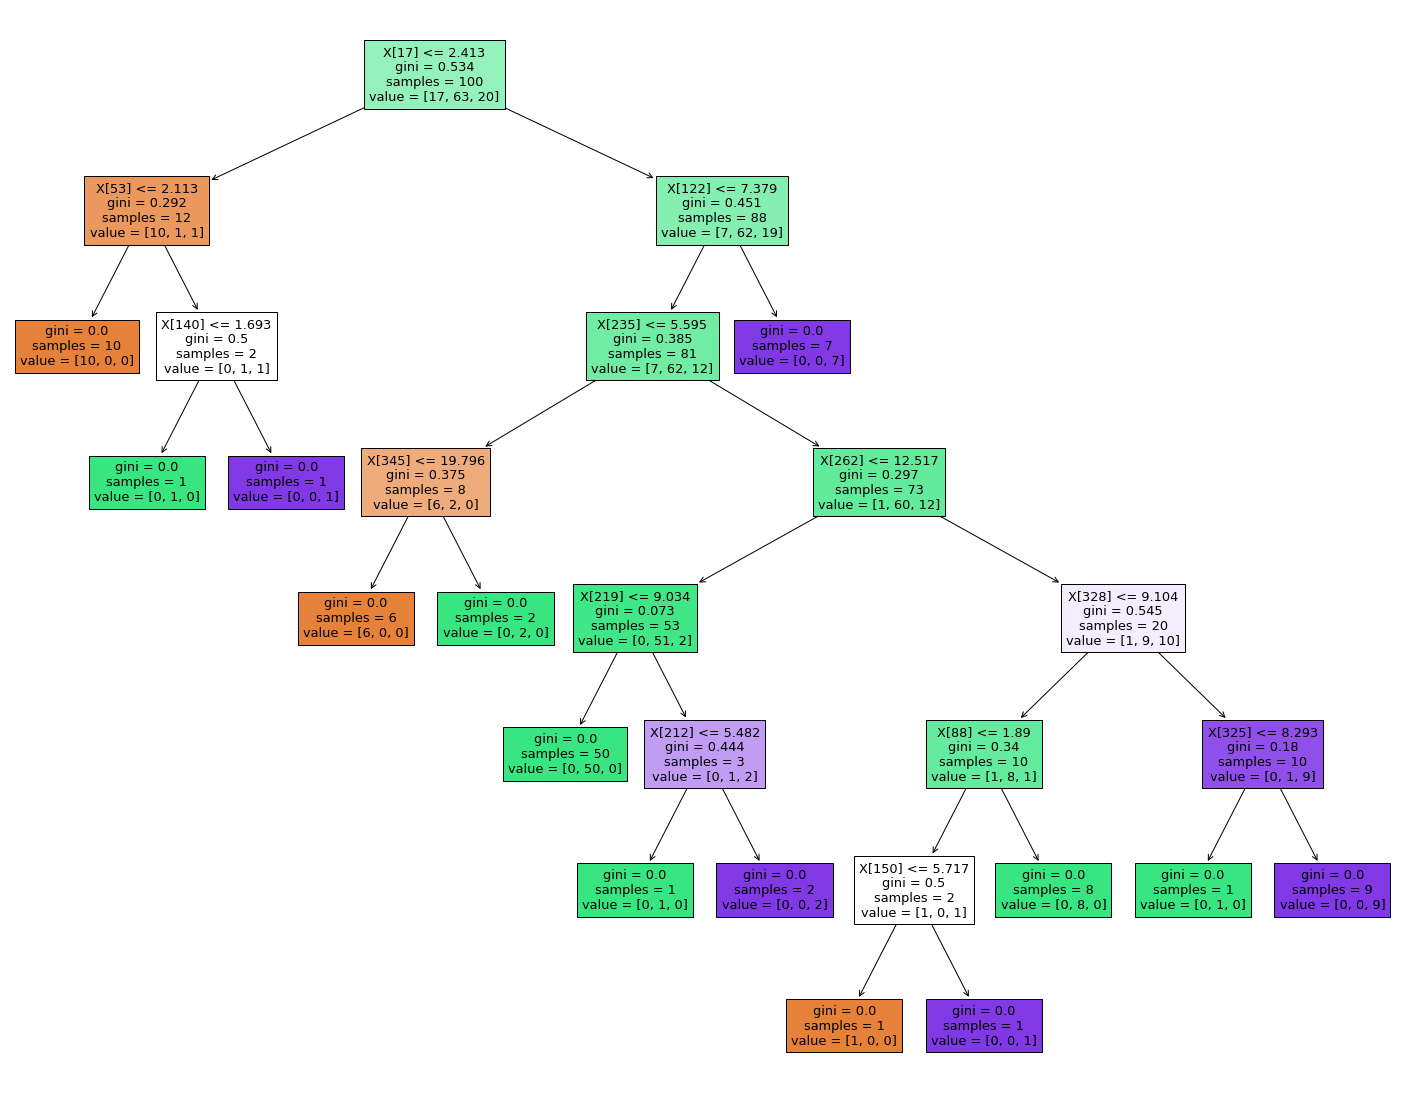

In [82]:
# plotting the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model,filled='true') 

Fitting a Random Classifier on the data

In [83]:
# Fitting the data on a Random Forest classifier
cv_scores1_list=[]
rf_classifier = RandomForestClassifier(
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='auto', max_depth=10)
cv_scores1=cross_val_score(rf_classifier, x, Y_train, cv=5)
cv_scores1_list.append(cv_scores1)
rf_classifier.fit(x, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, n_jobs=-1,
                       oob_score=True)

In [ ]:
We can clearly see that Random classifier gives better accuracy than decision tree

In [84]:
# print cross val scores and accuracy
print("Cross val scores: ")
print(cv_scores1_list)
y_pred = rf_classifier.predict(x_test)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

Cross val scores: 
[array([0.85, 0.75, 0.65, 0.6 , 0.7 ])]
ACCURACY OF THE MODEL:  0.7222222222222222


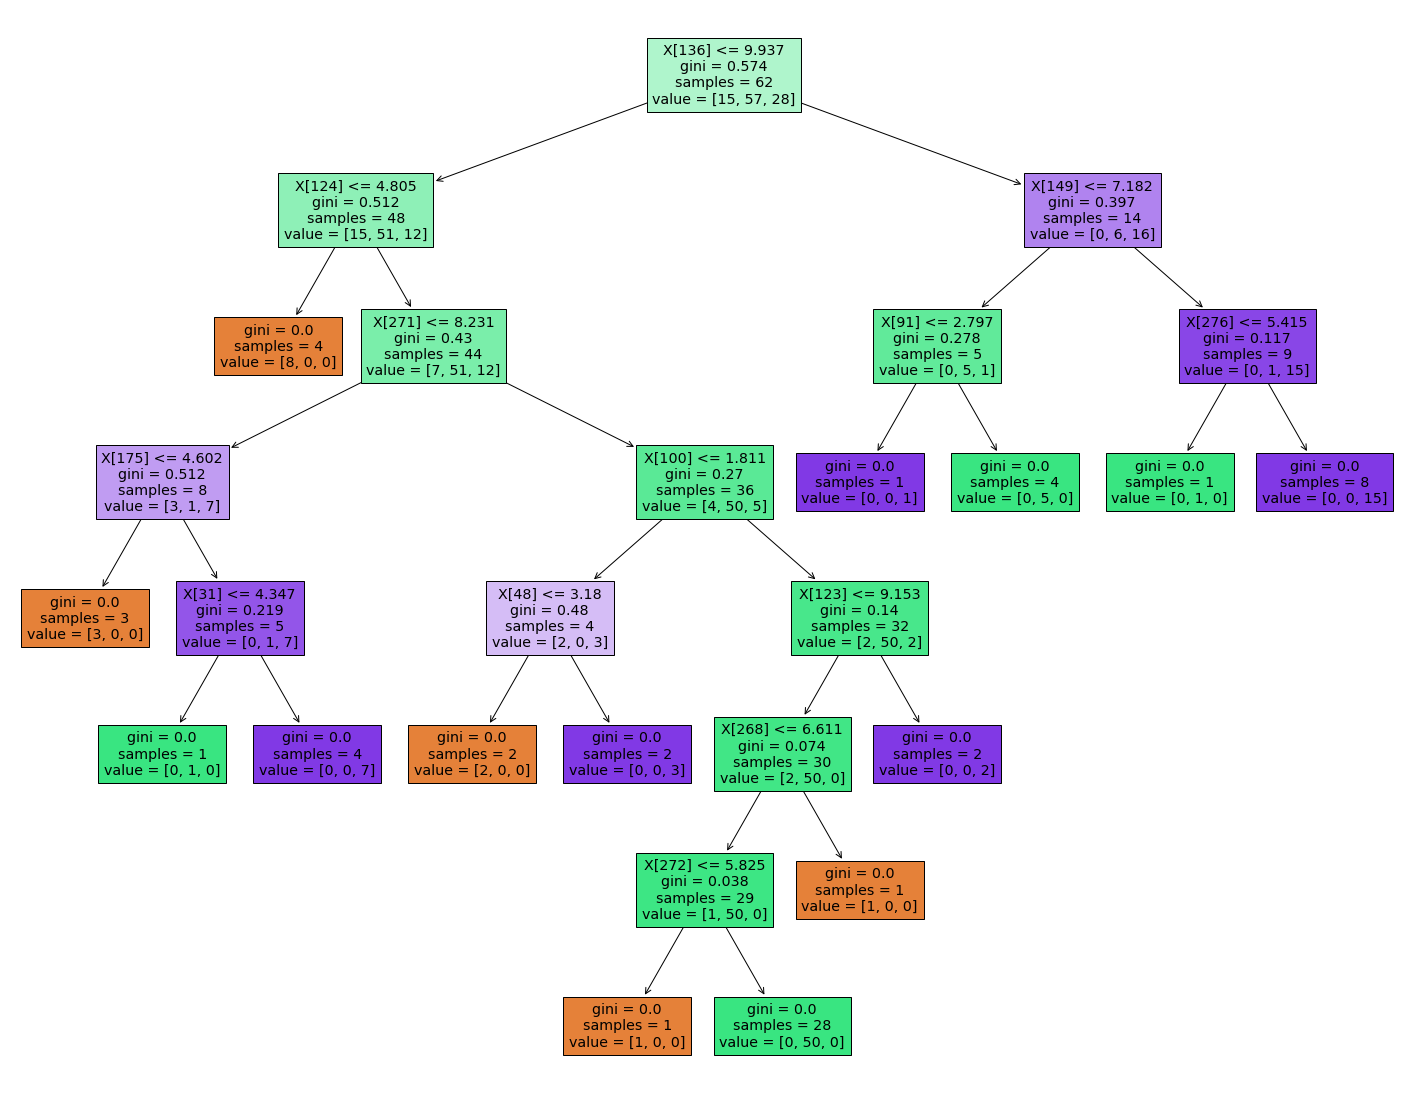

In [85]:
# Plotting the first estimator of Random Forest Classifier
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf_classifier.estimators_[0], 
                   filled=True)

Part 2 of question where labels are assigned to each location, year

In [133]:
# Calculating the mean and eviation corresponding to each location
# We calculate the labels for each location, year
# Now these labels act as data for the decision tree, where each year acts like a data point
matrix=[]
for i in range(annots['XR'].shape[0]):
    label1=[]
    s1=np.std(annots['XR'][i,:])
    m1=np.mean(annots['XR'][i,:])
    for j in range(annots['XR'].shape[1]):
        if(annots['XR'][i,j]>m1+s1):
         label1.append(1) 
        elif(annots['XR'][i,j]<m1-s1):
         label1.append(-1)
        else:
         label1.append(0)
    matrix.append(label1)
        

In [134]:
dataset1=np.array(matrix)
dataset1.shape

(357, 118)

Training Decision Tree for each location

In [88]:
# We make decison trees for each Location, where each year acts like a data point
# The input is the feature vector of all labels for a given year in all other locations (i.e labels of all locations except the one we are making decison tree for)
# The output label is the label for that location at that given year
cv_scores_list1=[]
accuracy_scores1=[]
for i in range(annots['XR'].shape[0]):  
    tree_model1= DecisionTreeClassifier(max_depth=10)
    a=np.delete(dataset1,i,0)
    a_x_train=a[:,:100]
    a_y_train=dataset1[i,:100]
    a_x_test=a[:,100:]
    a_y_test=dataset1[i,100:]
    cv_scores1=cross_val_score(tree_model1, a_x_train.transpose(),a_y_train, cv=5)
    cv_scores_list1.append(cv_scores1)
    accuracy_scores1.append(tree_model1.fit(a_x_train.transpose(),a_y_train).score(a_x_test.transpose(),a_y_test))
    

In [89]:
# printing the cv scores of all 357 decision trees
print("cv_scores: ")
cv_scores_list1

cv_scores: 


[array([0.8 , 0.75, 0.95, 1.  , 0.95]),
 array([0.9 , 1.  , 0.8 , 0.75, 0.85]),
 array([1.  , 0.75, 0.75, 0.85, 0.75]),
 array([0.75, 0.75, 0.65, 0.65, 0.6 ]),
 array([0.75, 0.85, 0.8 , 0.6 , 0.7 ]),
 array([0.85, 0.95, 1.  , 0.95, 0.95]),
 array([0.95, 0.95, 0.9 , 0.9 , 0.8 ]),
 array([0.85, 0.55, 0.8 , 0.75, 0.8 ]),
 array([0.8 , 0.7 , 0.7 , 0.8 , 0.55]),
 array([0.65, 0.65, 0.65, 0.3 , 0.45]),
 array([0.9 , 0.9 , 0.9 , 0.8 , 0.65]),
 array([0.75, 0.9 , 0.8 , 0.85, 0.95]),
 array([0.75, 0.8 , 0.9 , 0.85, 0.7 ]),
 array([0.9 , 0.7 , 0.75, 0.75, 0.8 ]),
 array([1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1.]),
 array([0.95, 0.9 , 0.9 , 0.6 , 0.6 ]),
 array([0.55, 0.7 , 0.7 , 0.5 , 0.6 ]),
 array([0.8 , 0.9 , 0.55, 0.85, 0.6 ]),
 array([0.15, 0.65, 0.65, 0.6 , 0.55]),
 array([0.35, 0.5 , 0.6 , 0.5 , 0.65]),
 array([0.8 , 0.8 , 0.75, 0.9 , 0.75]),
 array([0.9 , 0.75, 0.8 , 0.8 , 0.45]),
 array([0.95, 0.8 , 0.85, 0.65, 0.75]),
 array([0.9 , 0.8 , 0.75, 0.9 , 0.75]),
 array([0.65, 0.7 , 

In [90]:
# printing the final accuracy of all 357 decison trees
print("Final accuracies: ")
accuracy_scores1

Final accuracies: 


[1.0,
 0.9444444444444444,
 0.8333333333333334,
 0.5,
 0.8888888888888888,
 0.9444444444444444,
 0.6666666666666666,
 0.8888888888888888,
 0.6111111111111112,
 0.7777777777777778,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 0.7222222222222222,
 1.0,
 1.0,
 0.6111111111111112,
 0.5,
 0.7222222222222222,
 0.7222222222222222,
 0.5,
 0.7222222222222222,
 0.7777777777777778,
 0.8333333333333334,
 0.2222222222222222,
 0.5555555555555556,
 0.5555555555555556,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.6111111111111112,
 0.6666666666666666,
 0.7222222222222222,
 0.6111111111111112,
 0.5,
 0.7222222222222222,
 0.8333333333333334,
 0.3888888888888889,
 0.2777777777777778,
 0.4444444444444444,
 0.5,
 0.3888888888888889,
 0.3333333333333333,
 0.5,
 0.6111111111111112,
 0.6111111111111112,
 0.3888888888888889,
 0.3333333333333333,
 0.5,
 0.5,
 0.4444444444444444,
 0.6666666666666666,
 0.7222222222222222,
 0.5555555555555556,
 0.6666666666666666,
 0.5555555555555556,
 0.7

In [91]:
print(len(accuracy_scores1),len(cv_scores_list1))

357 357


Sample Run for Location 25. From the tree we can see predictors are 62, 223, 39, 43, 133, 58, 26, 17, 257, 300 ( I have added one to locations >= 25 shown in tree as in reality it is that location. It shows different number because we delete the row of 25th location from training data)

0.5555555555555556


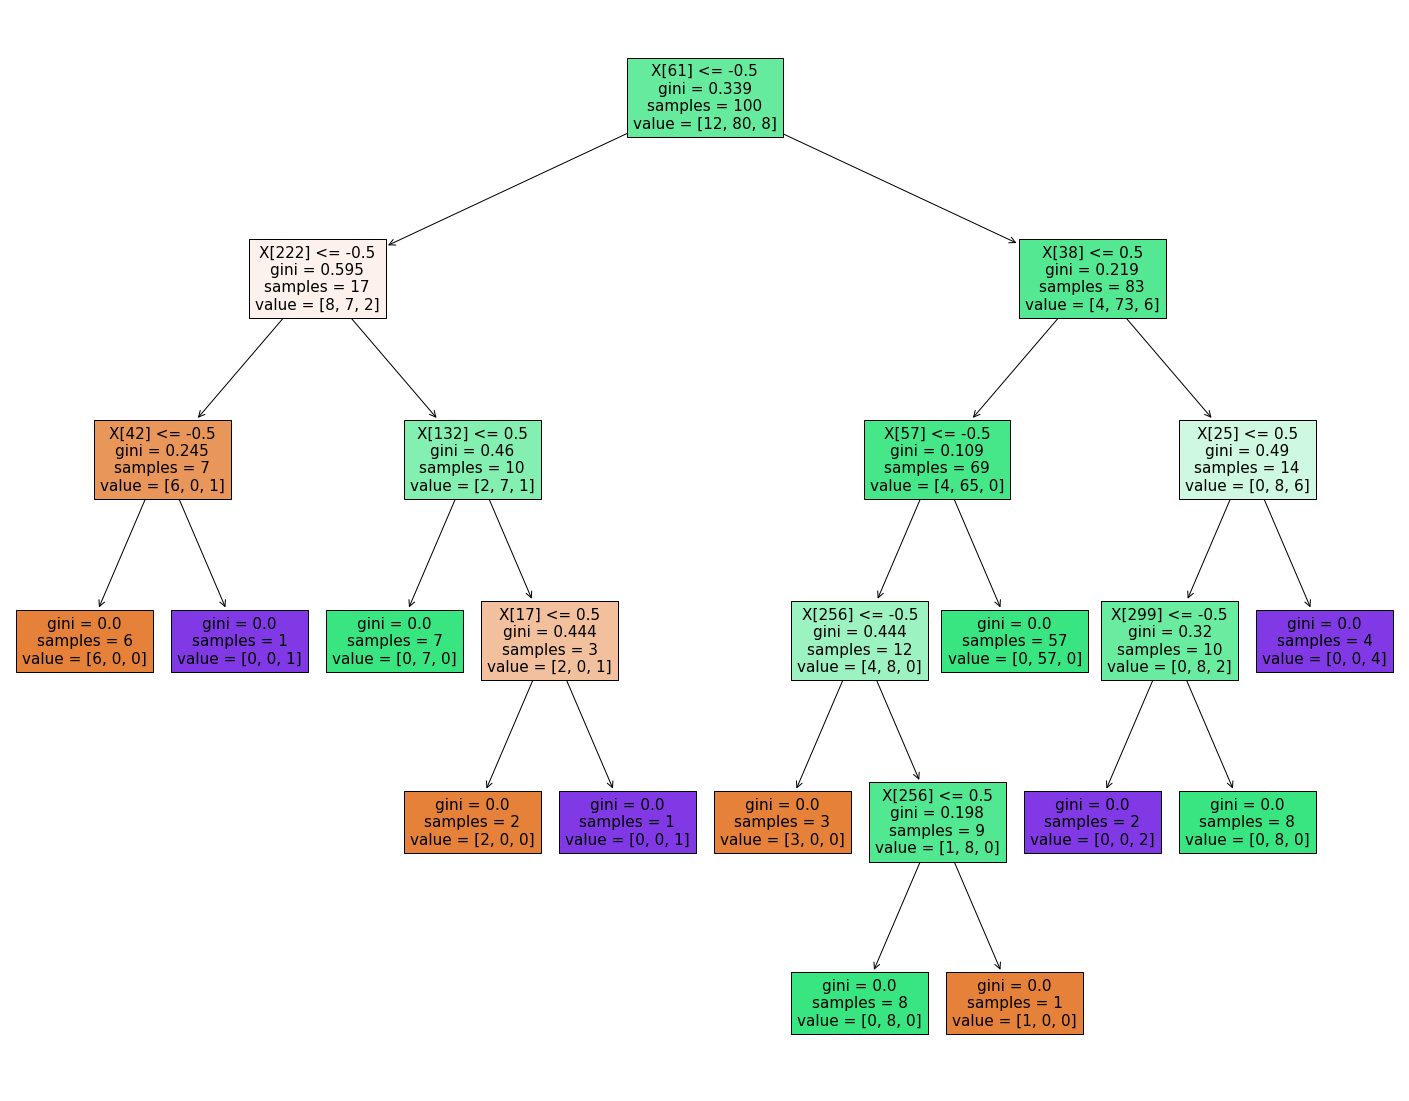

In [94]:
#sample run for location 25

tree_model1= DecisionTreeClassifier(max_depth=10)
a=np.delete(dataset1,25,0)
a_x_train=a[:,:100]
a_y_train=dataset1[25,:100]
a_x_test=a[:,100:]
a_y_test=dataset1[25,100:]
print(tree_model1.fit(a_x_train.transpose(),a_y_train).score(a_x_test.transpose(),a_y_test))

# Visualizing the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model1,filled='true') 

Making random classifier corresponding to each location

In [95]:
# Making 357 Random Forests for each location
cv_scores_list2=[]
accuracy_scores_list2=[]
for i in range(annots['XR'].shape[0]): 
    
    rf_classifier = RandomForestClassifier(
                      n_estimators=50,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='auto', max_depth=10)
    a=np.delete(dataset1,i,0)
    a_x_train=a[:,:100]
    a_y_train=dataset1[i,:100]
    a_x_test=a[:,100:]
    a_y_test=dataset1[i,100:]
    cv_scores2=cross_val_score(rf_classifier, a_x_train.transpose(), a_y_train, cv=5)
    cv_scores_list2.append(cv_scores2)
    rf_classifier.fit(a_x_train.transpose(), a_y_train)
    y_pred = rf_classifier.predict(a_x_test.transpose())
    accuracy_scores_list2.append(metrics.accuracy_score(a_y_test, y_pred))

In [96]:
# print the cv score of 357 decison trees
print("cv scores: ")
cv_scores_list2

cv scores: 


[array([0.75, 0.9 , 0.9 , 1.  , 0.9 ]),
 array([0.9 , 0.85, 0.9 , 1.  , 0.85]),
 array([0.85, 0.85, 0.8 , 0.75, 0.7 ]),
 array([0.8 , 0.9 , 0.8 , 0.75, 0.8 ]),
 array([0.85, 0.8 , 0.9 , 0.85, 0.75]),
 array([0.9 , 0.8 , 0.9 , 0.95, 0.8 ]),
 array([0.95, 0.95, 0.8 , 0.9 , 0.85]),
 array([0.8 , 0.85, 0.75, 0.7 , 0.75]),
 array([0.8 , 0.7 , 0.65, 0.75, 0.7 ]),
 array([0.8 , 0.75, 0.75, 0.65, 0.75]),
 array([0.8 , 0.8 , 0.75, 0.75, 0.85]),
 array([0.8 , 0.8 , 0.8 , 0.85, 0.8 ]),
 array([0.85, 0.85, 0.95, 0.8 , 0.85]),
 array([0.95, 0.85, 0.8 , 0.9 , 0.75]),
 array([0.95, 0.9 , 0.75, 0.95, 0.8 ]),
 array([0.9 , 0.9 , 0.85, 1.  , 0.9 ]),
 array([0.9 , 0.9 , 0.8 , 0.8 , 0.85]),
 array([0.75, 0.85, 0.65, 0.5 , 0.85]),
 array([0.85, 0.85, 0.8 , 0.8 , 0.75]),
 array([0.8 , 0.7 , 0.75, 0.75, 0.75]),
 array([0.7 , 0.8 , 0.7 , 0.75, 0.8 ]),
 array([0.85, 0.8 , 0.95, 0.95, 0.8 ]),
 array([0.9 , 0.8 , 0.85, 0.8 , 0.75]),
 array([0.85, 0.9 , 0.8 , 0.85, 0.8 ]),
 array([0.9 , 0.95, 0.75, 0.95, 0.85]),


For most locations Random Forest gives better results than Decison tree

In [97]:
# print final accuracies
print("Final accuracies: ")
accuracy_scores_list2

Final accuracies: 


[0.9444444444444444,
 0.8333333333333334,
 0.7222222222222222,
 0.6666666666666666,
 0.7222222222222222,
 0.7222222222222222,
 0.6111111111111112,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.3888888888888889,
 0.5555555555555556,
 0.6666666666666666,
 0.6666666666666666,
 0.8333333333333334,
 0.8333333333333334,
 0.6111111111111112,
 0.7222222222222222,
 0.6111111111111112,
 0.7222222222222222,
 0.6111111111111112,
 0.6111111111111112,
 0.7777777777777778,
 0.7222222222222222,
 0.7777777777777778,
 0.5555555555555556,
 0.5,
 0.7222222222222222,
 0.7777777777777778,
 0.6111111111111112,
 0.7222222222222222,
 0.7777777777777778,
 0.7222222222222222,
 0.7222222222222222,
 0.5,
 0.7222222222222222,
 0.6666666666666666,
 0.5,
 0.6111111111111112,
 0.8333333333333334,
 0.5,
 0.7777777777777778,
 0.3333333333333333,
 0.5555555555555556,
 0.7222222222222222,
 0.7777777777777778,
 0.6666666666666666,
 0.7222222222222222,
 0.7222222222222222,
 0.7777777777777778,
 0.7777777

We can clearly see that for sample run 25, Random Forest gives better results as decision tree had given 55.555 accuracy

In [136]:
#sample run of RandomForest for location 25
rf_classifier = RandomForestClassifier(
                      n_estimators=50,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      max_features='auto', max_depth=10)
a=np.delete(dataset1,25,0)
a_x_train=a[:,:100]
a_y_train=dataset1[25,:100]
a_x_test=a[:,100:]
a_y_test=dataset1[25,100:]
rf_classifier.fit(a_x_train.transpose(), a_y_train)
y_pred = rf_classifier.predict(a_x_test.transpose())
print(metrics.accuracy_score(a_y_test, y_pred))

0.6111111111111112


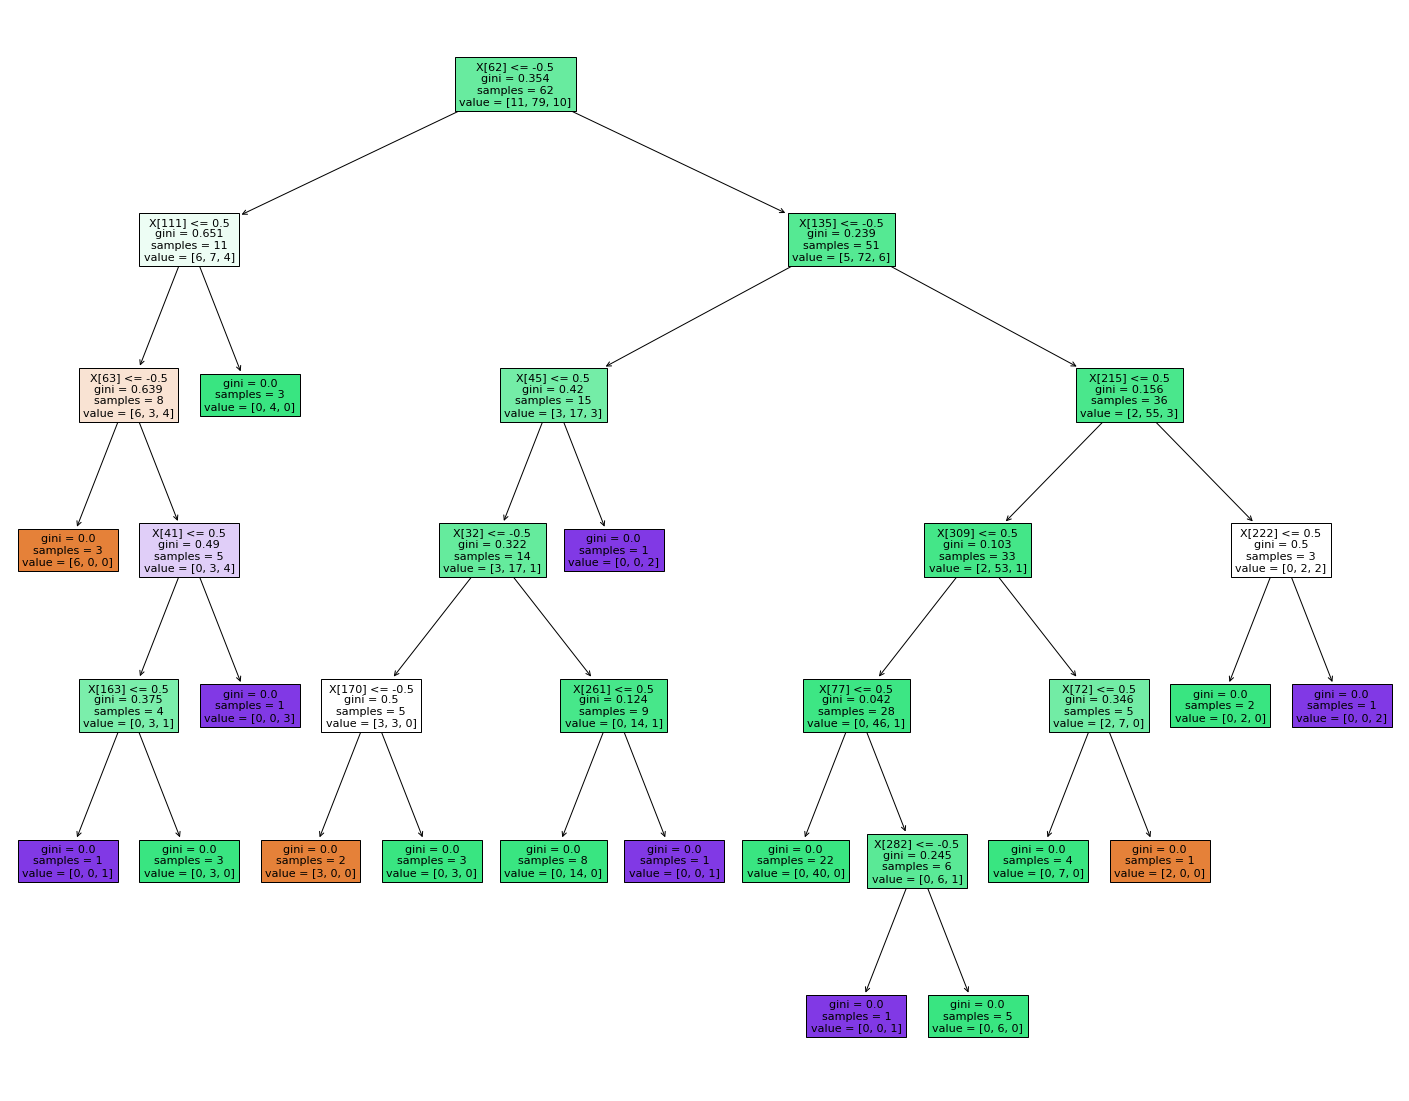

In [137]:
# plotting the first estimator of Random Forest
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf_classifier.estimators_[0], 
                   filled=True)